# Preliminaries

### Imports

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np

In [14]:

import matplotlib.pyplot as plt

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Dimensionality reduction

Reading the preprocessed, scaled and encoded dataset

In [16]:
df_scaled = pd.read_csv('Data/dataset_preprocessed.csv')

### 1. Principal component analysis

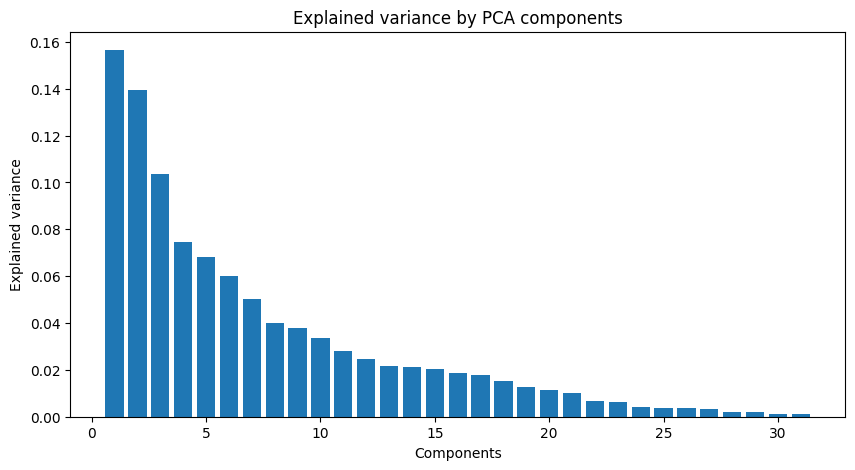

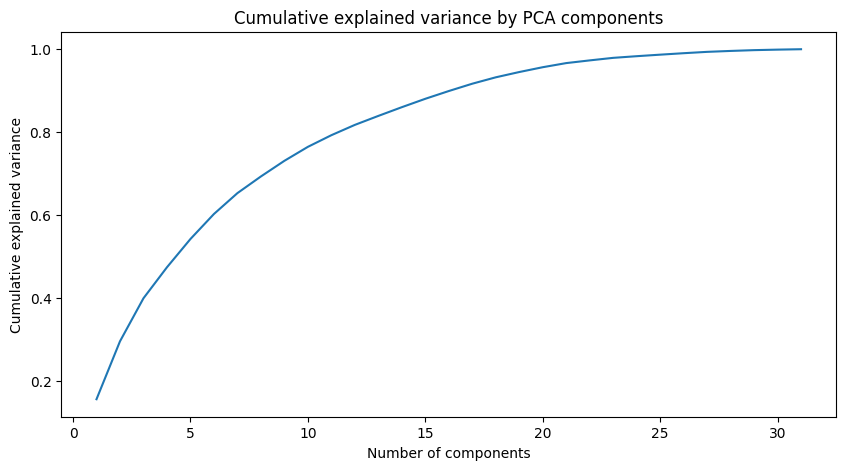

                                  PC1       PC2       PC3       PC4       PC5  \
releaseYear                  0.001071 -0.017663  0.031289 -0.017226 -0.034478   
runtimeMinutes              -0.025860 -0.004329 -0.025756 -0.015027  0.001184   
lifetimeGross                0.009111 -0.004041 -0.014206 -0.011874  0.003319   
nrOfReleases                 0.010524 -0.014331 -0.124409 -0.030194  0.052445   
director_nrOfMovies          0.007607  0.006873 -0.018578  0.000846  0.005882   
nrOfEmployees               -0.000329  0.007803 -0.038996 -0.010357  0.004824   
nrOfActors                  -0.018307  0.033706 -0.082318 -0.004604  0.021773   
numVotes                     0.011309 -0.014594 -0.034530 -0.018346  0.011666   
sameYearTotalMoviesReleased  0.002619 -0.057716  0.074409 -0.054575 -0.080867   
Action                       0.093538 -0.158153 -0.230213 -0.111797 -0.024819   
Adventure                    0.102747 -0.052126 -0.106360 -0.201350  0.000797   
Animation                   

In [17]:
pca = PCA()  
features = df_scaled.drop('averageRating', axis=1)
principalComponents = pca.fit_transform(features)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained variance by PCA components')
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.title('Cumulative explained variance by PCA components')
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(principalComponents[0]))], index=features.columns)
print(loading_matrix)


print("$$$$$$$$$$$$$$$$$$$$$$$$$")
abs_loading_matrix = np.abs(loading_matrix)

significant_components = abs_loading_matrix.iloc[:5]  
mean_loadings = significant_components.mean(axis=0)
sorted_loadings = mean_loadings.sort_values()

print("Features sorted by their contributions (ascending):")
print(sorted_loadings)




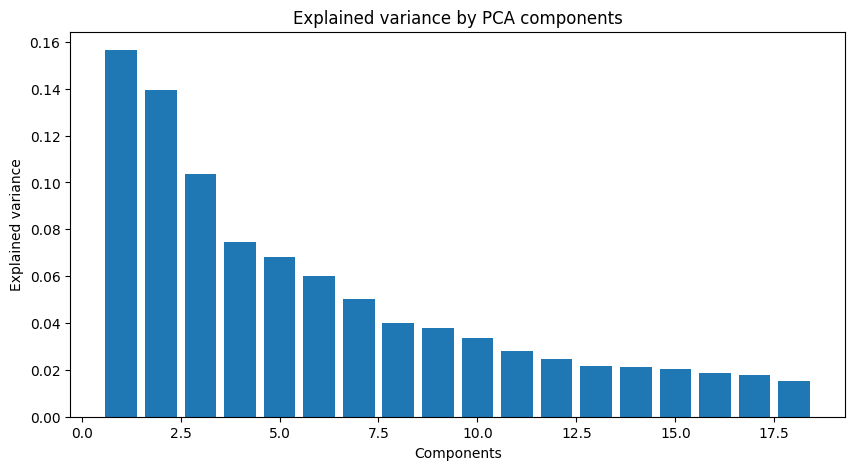

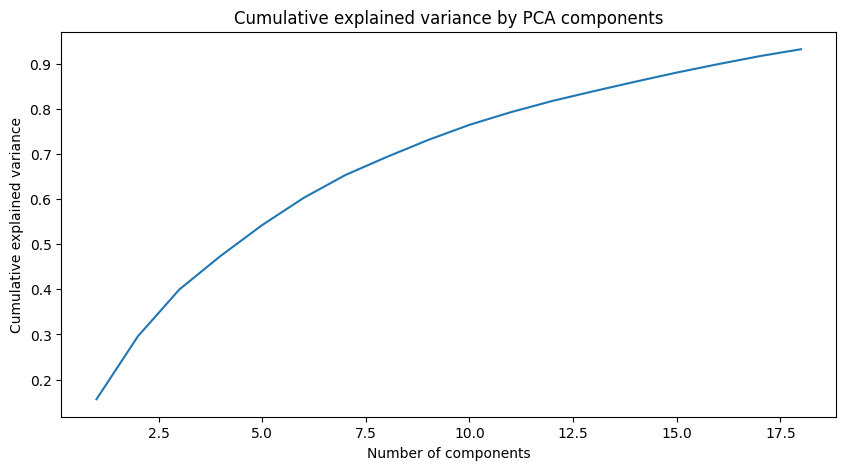

In [18]:
n = 18
pca_reduced = PCA(n_components=n)
principalComponents_reduced = pca_reduced.fit_transform(features)

df_reduced = pd.DataFrame(data=principalComponents_reduced, columns=[f'PC{i+1}' for i in range(n)])

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca_reduced.explained_variance_ratio_) + 1), pca_reduced.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained variance by PCA components')
plt.show()

cumulative_variance = np.cumsum(pca_reduced.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.title('Cumulative explained variance by PCA components')
plt.show()

Test with logistic regression

Metrics for LR1:
Accuracy: 0.7202
Weighted F1: 0.7201
Weighted Precision: 0.7201
Weighted Recall: 0.7202
Macro-Averaged Precision: 0.7201
Macro-Averaged Recall: 0.7197
F1: [0.73007712 0.70954357]
Precision: [0.7221869 0.7179846]
Confusion Matrix


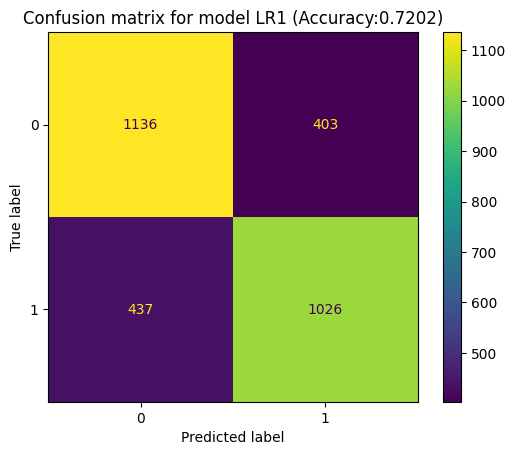

In [19]:
# Utilities
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
def calculate_metrics(model_name, y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted'),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Macro-Averaged Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro-Averaged Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': str(f1_score(y_true, y_pred, average=None)),
        'Precision': str( precision_score(y_true, y_pred, average=None)),
    }
    
    # Print the metrics
    print(f"Metrics for {model_name}:")
    for metric_name, metric_value in metrics.items():
        try:
            print(f"{metric_name}: {metric_value:.4f}")
        except:
            print(f"{metric_name}: {metric_value}")

    print("Confusion Matrix")
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot()
    
    plt.title(f'Confusion matrix for model {model_name} (Accuracy:{metrics["Accuracy"]:.4f})')
    plt.show()
    
    # Create df to store metrics
    df_metrics = pd.DataFrame(metrics, index=[model_name])
    
    return df_metrics

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df_reduced, 
    df_scaled['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)

In [20]:
df_reduced.to_csv("DimensionalityReductionData/PCA.csv", index=False)

### 2. t-distributed stochastic neighbor embedding

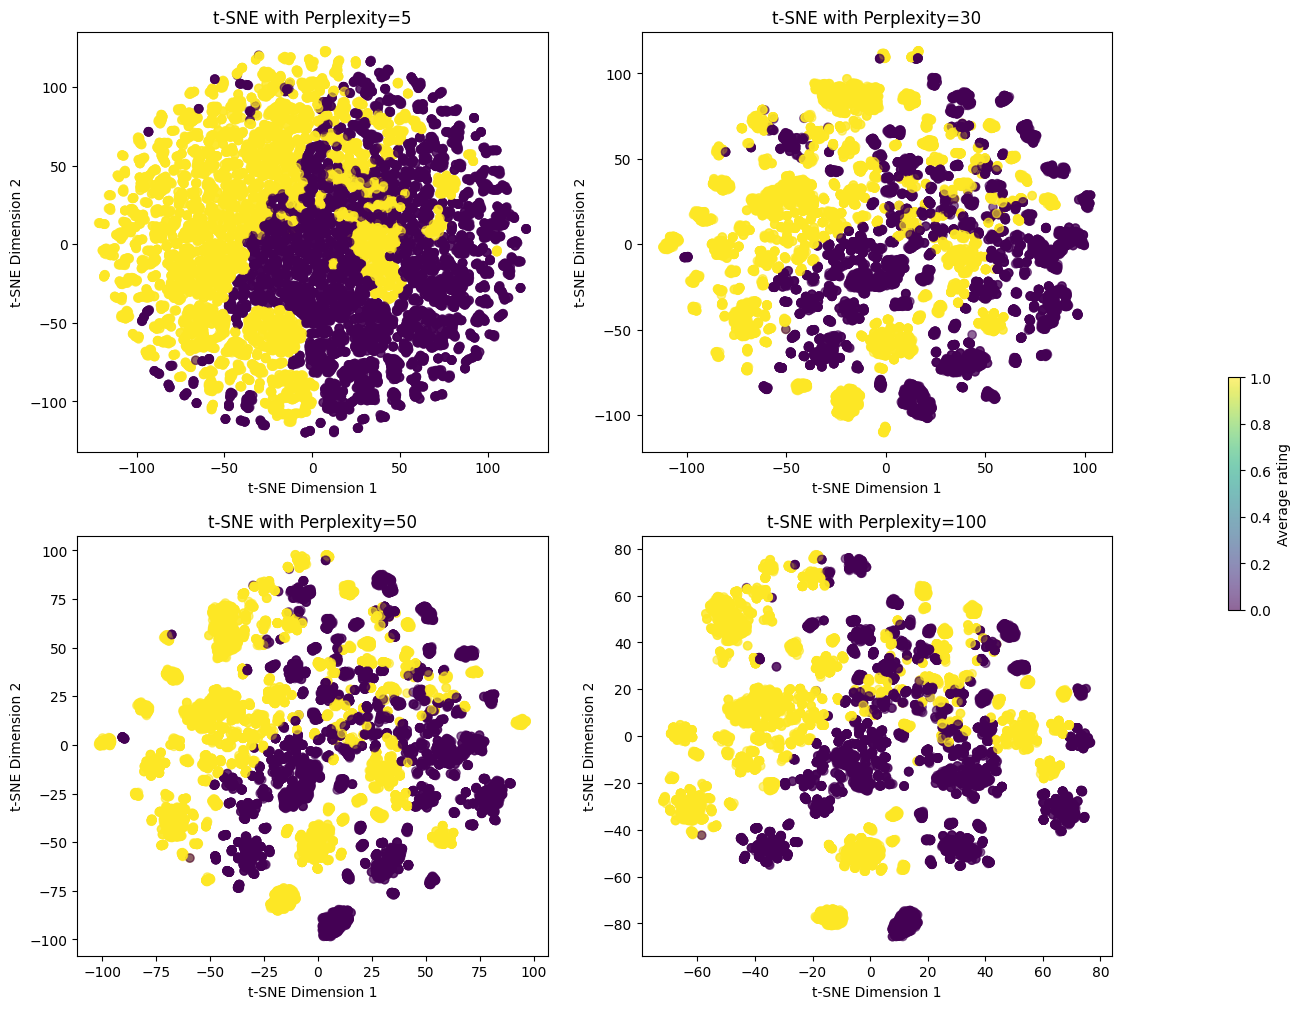

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

n_components = 2
perplexities = [5, 30, 50, 100]
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=1000, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)
    sc = axs[idx].scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_scaled['averageRating'], cmap='viridis', alpha=0.6)
    axs[idx].set_title(f't-SNE with Perplexity={perplexity}')
    axs[idx].set_xlabel('t-SNE Dimension 1')
    axs[idx].set_ylabel('t-SNE Dimension 2')

fig.colorbar(sc, ax=axs, orientation='vertical', fraction=0.01, pad=0.1, label='Average rating')
plt.show()


In [22]:
tsne = TSNE(random_state=42, n_iter=1000, perplexity=50, n_components=2) # method used is Barnes-Hut. "exact" method takes way too much time
tsne_results = tsne.fit_transform(df_scaled)


Metrics for LR1:
Accuracy: 0.6646
Weighted F1: 0.6646
Weighted Precision: 0.6650
Weighted Recall: 0.6646
Macro-Averaged Precision: 0.6646
Macro-Averaged Recall: 0.6647
F1: [0.66798549 0.66105688]
Precision: [0.67804552 0.65119363]
Confusion Matrix


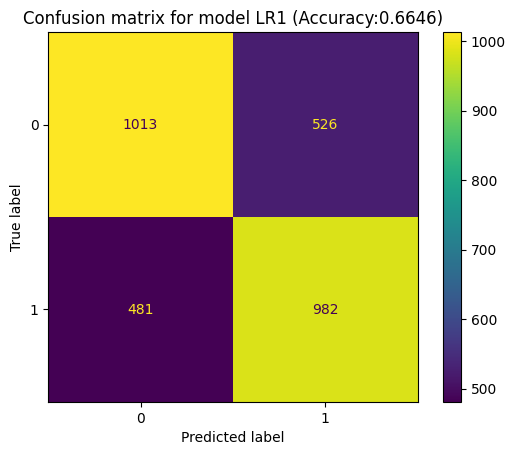

In [23]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    tsne_results, 
    df_scaled['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)

In [25]:
df_tsne = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])

df_tsne.to_csv("DimensionalityReductionData/t-SNE.csv", index=False)

### 3. Linear Discriminant Analysis

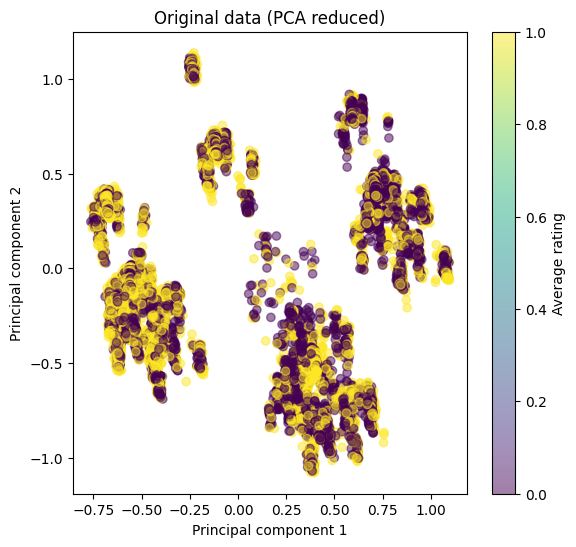

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

features = df_scaled.drop('averageRating', axis=1)
labels = df_scaled['averageRating']
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, alpha=0.5)
plt.title('Original data (PCA reduced)')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar(label='Average rating')
lda = LDA(n_components=1) 
features_lda = lda.fit_transform(features, labels)


Metrics for LR1:
Accuracy: 0.5610
Weighted F1: 0.5609
Weighted Precision: 0.5618
Weighted Recall: 0.5610
Macro-Averaged Precision: 0.5614
Macro-Averaged Recall: 0.5614
F1: [0.55978624 0.56212625]
Precision: [0.57594502 0.5468649 ]
Confusion Matrix


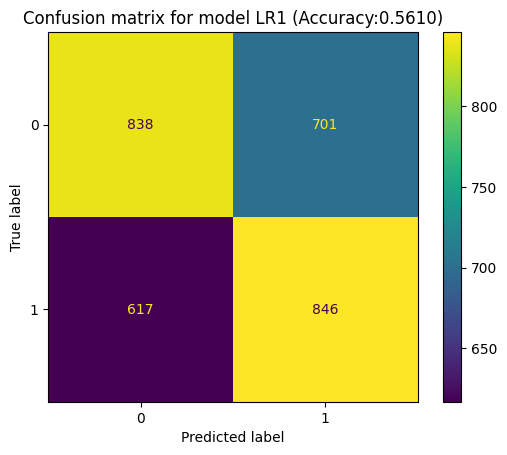

In [31]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    features_pca, 
    df_scaled['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)

Metrics for LR1:
Accuracy: 0.7452
Weighted F1: 0.7450
Weighted Precision: 0.7453
Weighted Recall: 0.7452
Macro-Averaged Precision: 0.7453
Macro-Averaged Recall: 0.7445
F1: [0.75582509 0.73354232]
Precision: [0.74278545 0.74786932]
Confusion Matrix


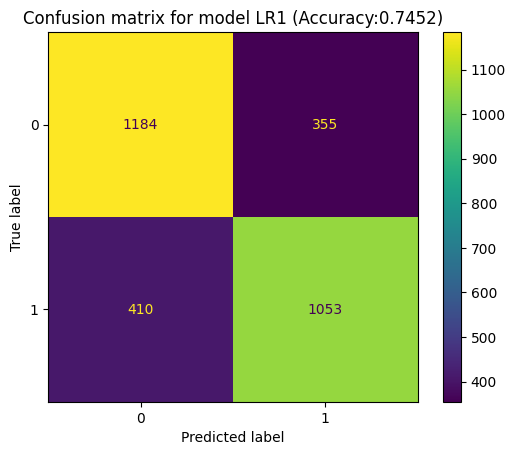

In [36]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    features_lda, 
    df_scaled['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)

In [35]:
df_lda = pd.DataFrame(features_lda, columns=['LD1'])
df_lda.to_csv("DimensionalityReductionData/lda.csv", index=False)